# TC2004B: CIENCIA DE DATOS

## Contenido

1. Leer archivo
1. Preprocesar los datos
1. Análisis y Visualización
1. Complemento preprocesamiento y análisis
1. Agrupamiento usando ML - UL

## 1. Leer archivo

In [ ]:
# importamos librerías
import warnings
warnings.filterwarnings("ignore")
import numpy as np # librería para poder usar arreglos
import pandas as pd # librería para poder usad DataFrames (tablas)
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [ ]:
def get_data():

    dataSet = pd.read_csv("most_watched_anime_dataset_100_entries.csv", header=0)

    return dataSet

def infoData(dataSet):
    """
    Function to get general information about the data
    """

    print(dataSet.head())
    print("")
    print(dataSet.info())
    print("")
    print(dataSet.isnull().sum())
    print("")

In [ ]:
data = get_data()
infoData(data)

            Anime Name Most Watched in Country  Ratings  Number of Episodes  \
0  Fullmetal Alchemist                  Brazil      8.8               317.0   
1            Haikyuu!!                  Mexico      9.2               420.0   
2                  NaN             South Korea      7.4               419.0   
3               Bleach                  Brazil      6.4                 NaN   
4     Sword Art Online                     NaN      9.8               327.0   

  Animation Studio Name  Budget (in Million USD)  Release Year      Genre  \
0              Ufotable                    80.61        1998.0    Fantasy   
1                 MAPPA                    74.99        2022.0  Adventure   
2          A-1 Pictures                    59.05        2009.0    Mystery   
3              Ufotable                    45.35        2002.0    Fantasy   
4              Madhouse                    15.90        2017.0        NaN   

   Duration per Episode (minutes)  
0                         

## 2. Preprocesar los datos

In [ ]:
def preprocessed_data(data):

  data_set = data.copy()
  data_set = data_set[data_set["Most Watched in Country"].notna()]
  data_set = data_set[data_set["Ratings"].notna()]
  data_set = data_set[data_set["Animation Studio Name"].notna()]
  data_set = data_set[data_set["Budget (in Million USD)"].notna()]

  return data_set

In [14]:
preprocessed = preprocessed_data(data)
print(preprocessed)

             Anime Name Most Watched in Country  Ratings  Number of Episodes  \
0   Fullmetal Alchemist                  Brazil      8.8               317.0   
1             Haikyuu!!                  Mexico      9.2               420.0   
2                   NaN             South Korea      7.4               419.0   
3                Bleach                  Brazil      6.4                 NaN   
7                Bleach                   China      9.4                47.0   
..                  ...                     ...      ...                 ...   
94     Sword Art Online                 Germany      9.4               100.0   
96      Attack on Titan                  Brazil      8.8               248.0   
97                  NaN               Argentina      8.2               384.0   
98       Jujutsu Kaisen                   India      7.2               396.0   
99     My Hero Academia                Thailand      7.7               283.0   

   Animation Studio Name  Budget (in Mi

## 3. Análisis y Visualización

### Hipótesis
El nivel de inversión de cada casa productora influye en que tengan mayor rating y mayor penetración en más países.

In [ ]:
country_list = preprocessed["Most Watched in Country"].unique()
print(country_list)

['Brazil' 'Mexico' 'South Korea' 'China' 'Spain' 'United Kingdom'
 'Australia' 'Italy' 'Thailand' 'Argentina' 'India' 'Russia'
 'United States' 'Germany' 'Canada' 'France' 'Japan' 'Malaysia'
 'Philippines']


In [ ]:
country_count = preprocessed["Most Watched in Country"].value_counts()
print(country_count)
print("")
print("Total: ", country_count.sum())

Most Watched in Country
Argentina         6
Germany           6
Brazil            5
United States     5
China             5
Malaysia          4
Mexico            4
France            4
Russia            4
Thailand          4
United Kingdom    4
Canada            3
India             3
Australia         3
Italy             3
Japan             2
Spain             2
South Korea       1
Philippines       1
Name: count, dtype: int64

Total:  69


In [ ]:
import random
import string

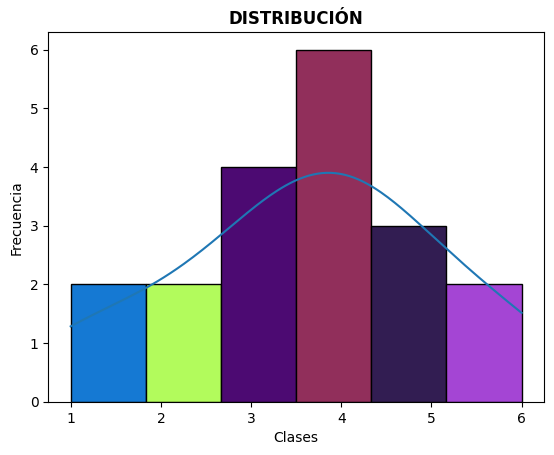

In [ ]:
plt.figure()
ax = sns.histplot(country_count, kde=True)

patches = ax.patches

# Random facecolor for each bar
for i in range(len(patches)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))
   # genera una lista de 6 caracteres aleatorios, combinando letras A-F y dígitos 0-9
   # representan un código de color hexadecimal, ejemplo: #A1B2C3

plt.title('DISTRIBUCIÓN', fontweight='bold')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

Clase: son las agrupaciones de los países según la frecuencia de la preferencia de películas.

Ej: La preferencia de 6 películas tiene una frecuencia de 2 países.

In [ ]:
print(round(country_count.describe(),2))

count    19.00
mean      3.63
std       1.46
min       1.00
25%       3.00
50%       4.00
75%       4.50
max       6.00
Name: count, dtype: float64


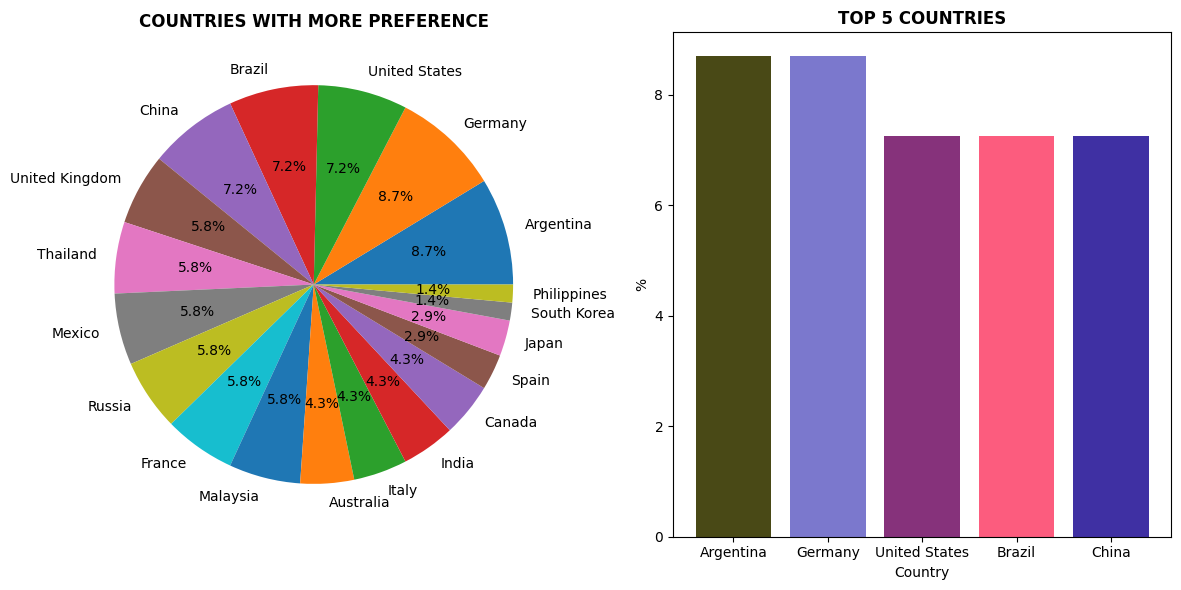

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].pie(country_count, labels=country_count.index, autopct='%1.1f%%')
ax[0].set_title('COUNTRIES WITH MORE PREFERENCE', fontweight='bold')

patches = ax[1].bar(country_count.index[0:5], country_count[0:5]/country_count.sum()*100)

# Random facecolor for each bar
for i in range(len(patches)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))

ax[1].set_title('TOP 5 COUNTRIES', fontweight='bold')
ax[1].set_xlabel('Country')
ax[1].set_ylabel('%')

plt.tight_layout()
plt.show()

In [ ]:
rating_per_country = preprocessed.pivot_table(index="Most Watched in Country", values="Ratings", aggfunc="mean").sort_values(by="Ratings", ascending=False)
print(round(rating_per_country, 2))

                         Ratings
Most Watched in Country         
Thailand                    8.98
China                       8.92
Italy                       8.83
France                      8.80
Spain                       8.75
United Kingdom              8.57
Russia                      8.50
Brazil                      8.42
Argentina                   8.25
Malaysia                    8.18
Australia                   8.13
Germany                     7.95
India                       7.90
Mexico                      7.80
United States               7.80
Japan                       7.65
Canada                      7.50
South Korea                 7.40
Philippines                 7.00


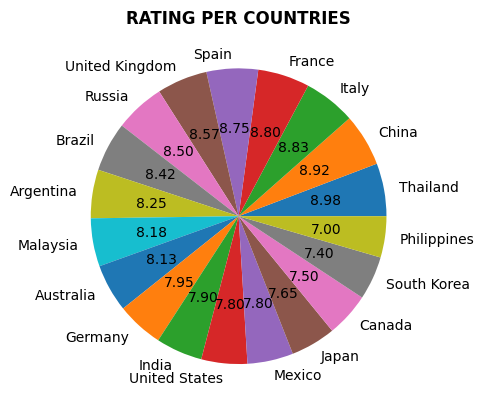

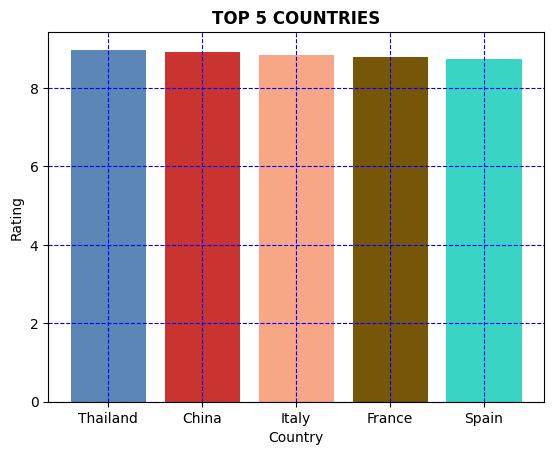

In [ ]:
plt.figure()
total = rating_per_country["Ratings"].sum() # Calculate the total rating
plt.pie(rating_per_country["Ratings"], labels=rating_per_country.index, autopct=lambda p: '{:.2f}'.format(p * total / 100))
plt.title('RATING PER COUNTRIES', fontweight='bold')
plt.show()

plt.figure()
patches = plt.bar(rating_per_country.index[0:5], rating_per_country["Ratings"][0:5])

for i in range(len(patches)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))

plt.grid(color='b',linestyle='dashed')
plt.title('TOP 5 COUNTRIES', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.show()

In [ ]:
rating_per_studio = preprocessed.pivot_table(index="Animation Studio Name", values="Ratings", aggfunc="mean").sort_values(by="Ratings", ascending=False)
print(round(rating_per_studio, 2))

                       Ratings
Animation Studio Name         
Bones                     8.80
Madhouse                  8.78
Pierrot                   8.63
MAPPA                     8.63
Wit Studio                8.43
A-1 Pictures              8.05
Trigger                   8.03
Ufotable                  8.02
Toei Animation            7.73
Studio Ghibli             7.70


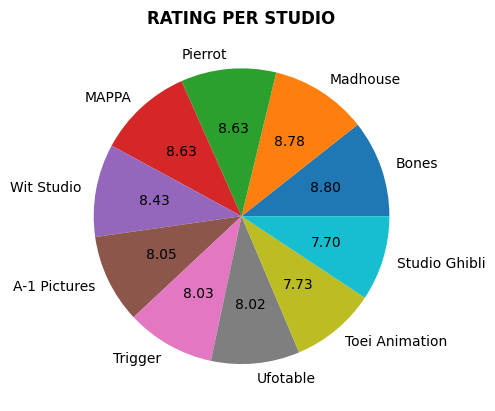

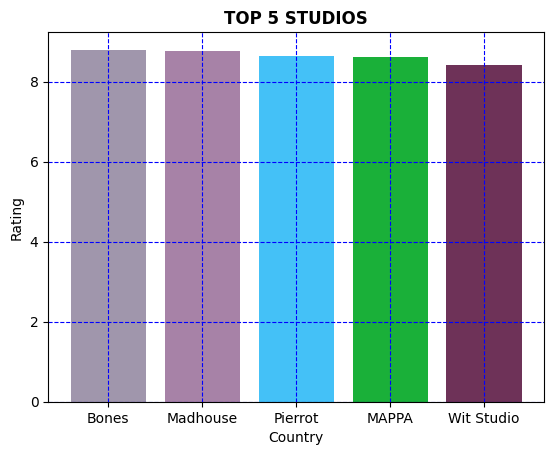

In [ ]:
plt.figure()
total = rating_per_studio["Ratings"].sum() # Calculate the total rating
plt.pie(rating_per_studio["Ratings"], labels=rating_per_studio.index, autopct=lambda p: '{:.2f}'.format(p * total / 100))
plt.title('RATING PER STUDIO', fontweight='bold')
plt.show()

plt.figure()
patches = plt.bar(rating_per_studio.index[0:5], rating_per_studio["Ratings"][0:5])

for i in range(len(patches)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))

plt.grid(color='b',linestyle='dashed')
plt.title('TOP 5 STUDIOS', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.show()

In [ ]:
total_spent = preprocessed.pivot_table(index="Animation Studio Name", values="Budget (in Million USD)", aggfunc="sum")

                       Budget (in Million USD)
Animation Studio Name                         
A-1 Pictures                            112.93
Bones                                   803.23
MAPPA                                   741.39
Madhouse                                781.87
Pierrot                                 135.46
Studio Ghibli                           770.76
Toei Animation                          289.84
Trigger                                 848.31
Ufotable                                550.34
Wit Studio                              327.98


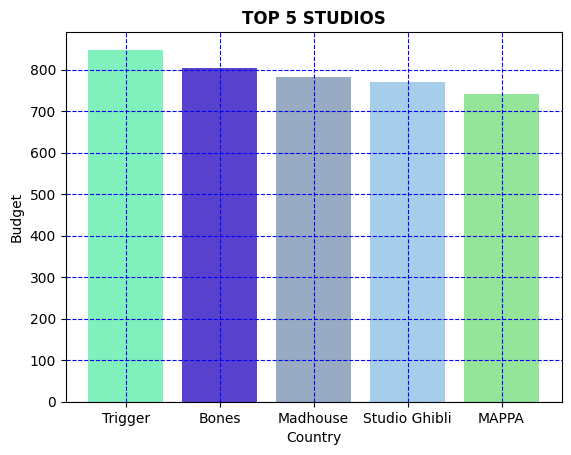

In [ ]:
plt.figure()
patches = plt.bar(total_spent.sort_values(by="Budget (in Million USD)", ascending=False).index[0:5], total_spent.sort_values(by="Budget (in Million USD)", ascending=False)["Budget (in Million USD)"][0:5])

for i in range(len(patches)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))

plt.grid(color='b',linestyle='dashed')
plt.title('TOP 5 STUDIOS', fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Budget')
plt.show()

In [ ]:
average_rating = preprocessed.pivot_table(index="Animation Studio Name", values="Ratings", aggfunc="mean")
print(round(average_rating, 2))

                       Ratings
Animation Studio Name         
A-1 Pictures              8.05
Bones                     8.80
MAPPA                     8.63
Madhouse                  8.78
Pierrot                   8.63
Studio Ghibli             7.70
Toei Animation            7.73
Trigger                   8.03
Ufotable                  8.02
Wit Studio                8.43


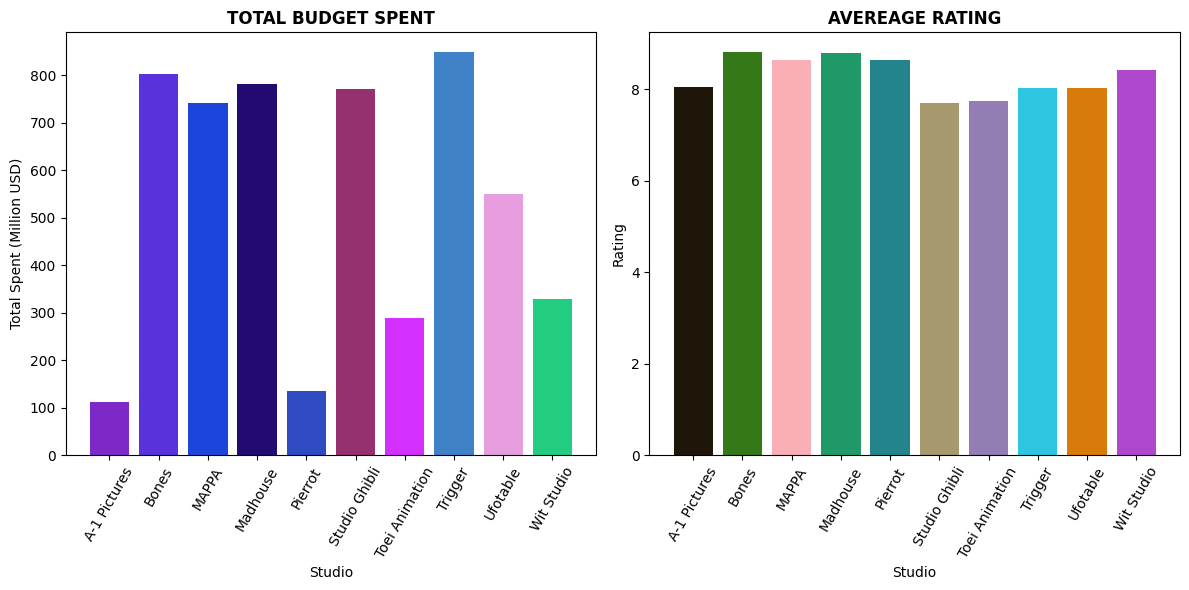

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

patches = ax[0].bar(total_spent.index, total_spent["Budget (in Million USD)"])

# Random facecolor for each bar
for i in range(len(patches)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))

ax[0].set_xticklabels(total_spent.index, rotation = 60)
ax[0].set_title('TOTAL BUDGET SPENT', fontweight='bold')
ax[0].set_xlabel('Studio')
ax[0].set_ylabel('Total Spent (Million USD)')

patches = ax[1].bar(average_rating.index, average_rating["Ratings"])

# Random facecolor for each bar
for i in range(len(patches)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))

ax[1].set_xticklabels(average_rating.index, rotation = 60)
ax[1].set_title('AVEREAGE RATING', fontweight='bold')
ax[1].set_xlabel('Studio')
ax[1].set_ylabel('Rating')

plt.tight_layout()
plt.show()

## 4. Complemento preprocesamiento y análisis

In [ ]:
column_list = ['Ratings','Number of Episodes','Budget (in Million USD)','Release Year', 'Duration per Episode (minutes)']

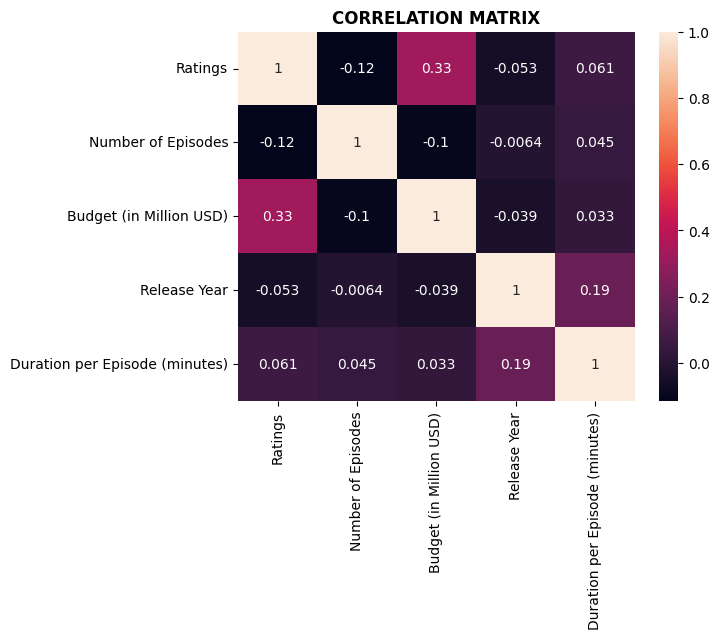

In [ ]:
plt.figure()
sns.heatmap(preprocessed[column_list].corr(), annot=True)
plt.title('CORRELATION MATRIX', fontweight='bold')
plt.show()

<Figure size 640x480 with 0 Axes>

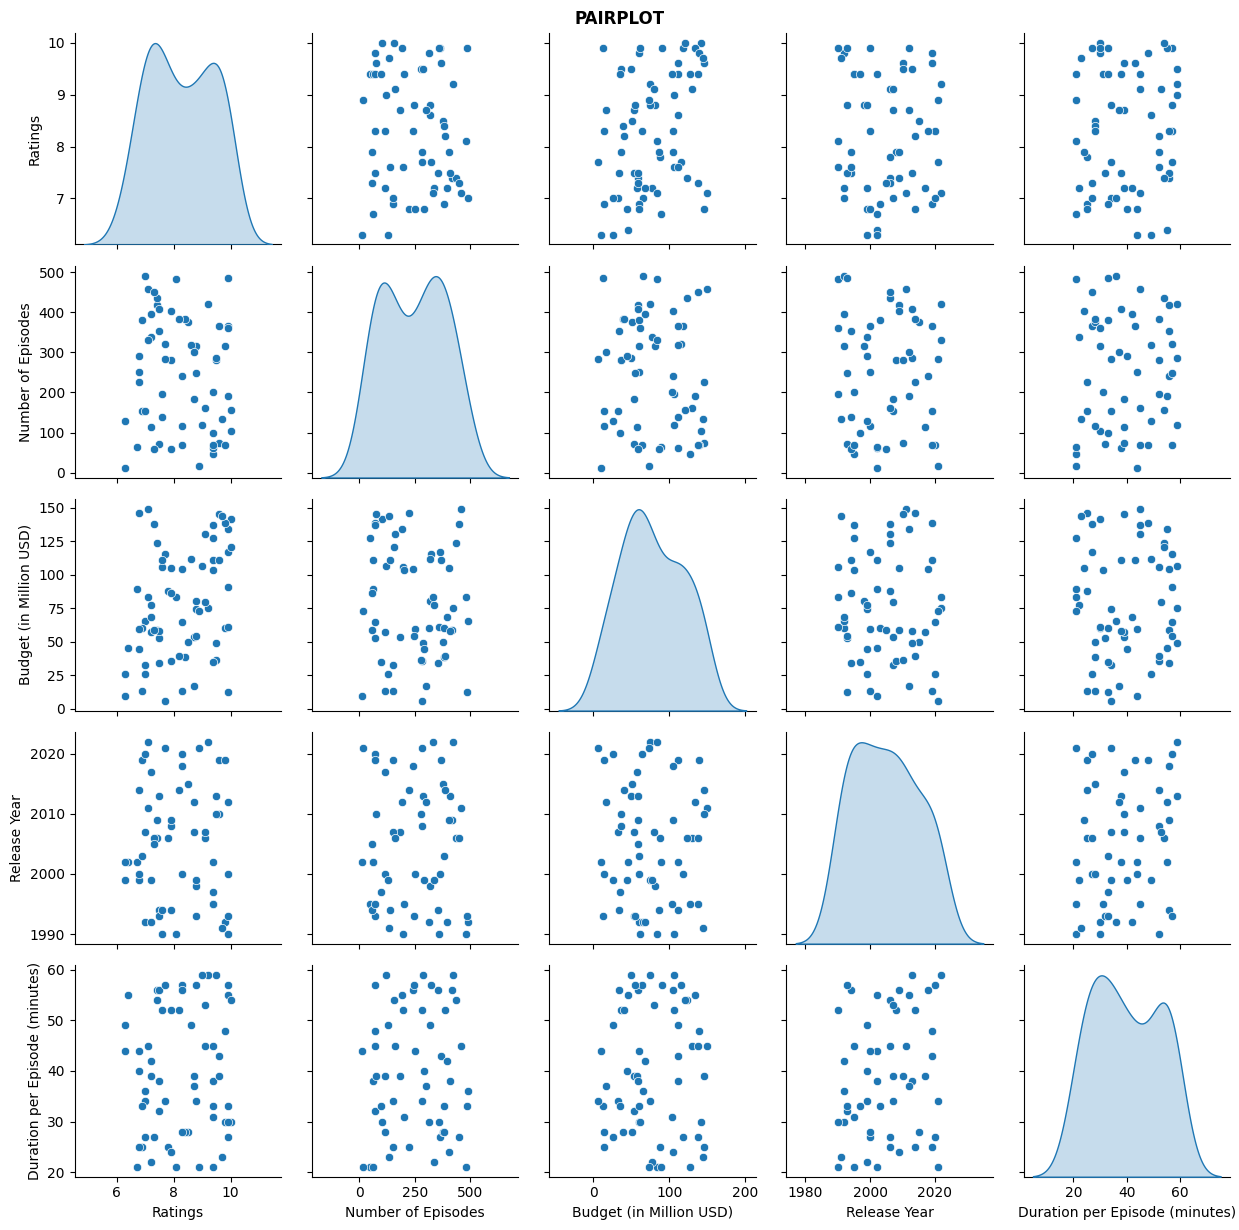

In [ ]:
plt.figure()
graph = sns.pairplot(preprocessed[column_list], diag_kind='kde')
graph.fig.suptitle("PAIRPLOT", fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
def preprocessed_data2(data):

  data_set = data.copy()
  data_set = data_set.dropna()
  data_set['Anime Name'] = data_set['Anime Name'].astype('category')
  data_set['Anime Name'] = data_set['Anime Name'].cat.codes
  data_set['Most Watched in Country'] = data_set['Most Watched in Country'].astype('category')
  data_set['Most Watched in Country'] = data_set['Most Watched in Country'].cat.codes
  data_set['Animation Studio Name'] = data_set['Animation Studio Name'].astype('category')
  data_set['Animation Studio Name'] = data_set['Animation Studio Name'].cat.codes

  return data_set[[col for col in data_set.columns if col != "Genre"]]

In [ ]:
preprocessed2 = preprocessed_data2(preprocessed)

print(preprocessed2.head(10))

    Anime Name  Most Watched in Country  Ratings  Number of Episodes  \
1            8                       11      9.2               420.0   
7            2                        4      9.4                47.0   
13          19                       14      6.9               153.0   
16          13                        4      8.1               482.0   
17          19                        1      7.0               154.0   
19          11                       13      9.9               365.0   
22          14                        0      6.8               226.0   
23          14                        7      7.1               458.0   
25          19                       14      9.4                62.0   
28          12                       12      9.6                74.0   

    Animation Studio Name  Budget (in Million USD)  Release Year  \
1                       1                    74.99        2022.0   
7                       1                   127.22        1995.0   
13 

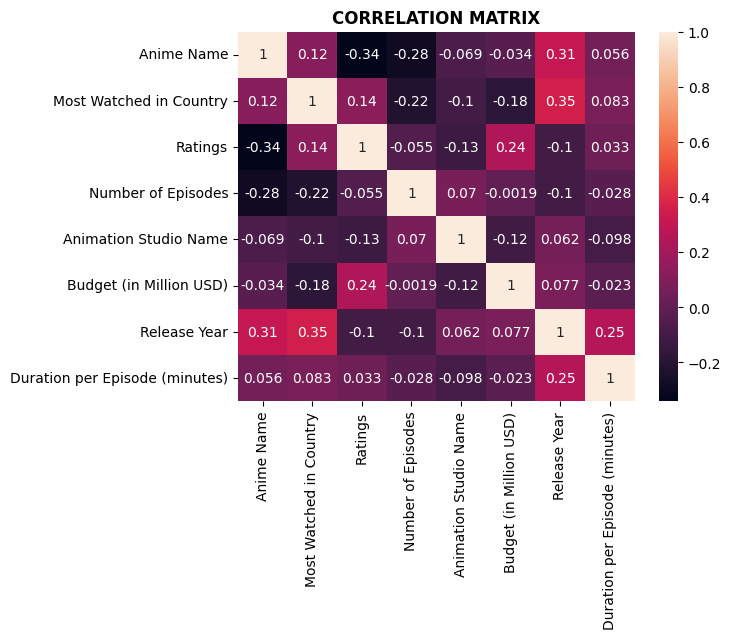

In [ ]:
plt.figure()
sns.heatmap(preprocessed2.corr(), annot=True)
plt.title('CORRELATION MATRIX', fontweight='bold')
plt.show()

## 5. Agrupamiento usando ML - UL

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [ ]:
train_data, test_data = train_test_split(preprocessed2, test_size=0.25, random_state=42)
print(len(train_data))
print(len(test_data))

30
11


In [ ]:
#xtrain_data = train_data.drop("Ratings", axis=1)
#ytrain_data = train_data["Ratings"]

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(train_data)
predictions = kmeans.predict(train_data)

train_data["cluster"] = predictions
print(train_data.head(8))

NameError: name 'KMeans' is not defined

In [ ]:
def graph_res(datos):

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

  # Now use ax.scatter instead of plt.scatter
  ax.scatter(datos['Most Watched in Country'], datos['Budget (in Million USD)'], datos['Ratings'],
            c=datos['cluster'], cmap='viridis')
  # c parameter is used for color mapping with 'Number of Episodes'

  ax.set_title('CLUSTERS', fontweight='bold')
  ax.set_xlabel('Country')
  ax.set_ylabel('Budget (in Million USD)')
  ax.set_zlabel('Ratings') # Add z-axis label

  plt.tight_layout()
  plt.show()

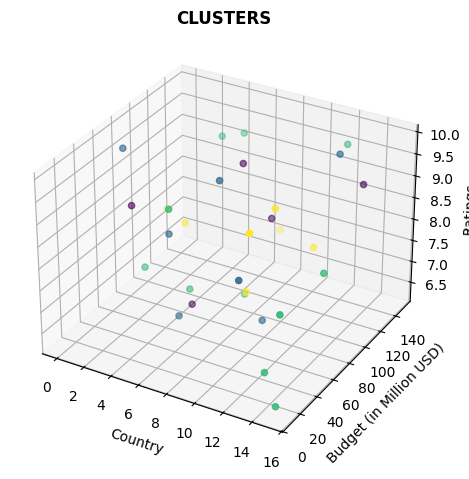

In [ ]:
graph_res(train_data)

    Anime Name  Most Watched in Country  Ratings  Number of Episodes  \
71           9                       10      9.5               286.0   
34           4                        1      7.5               353.0   
25          19                       14      9.4                62.0   
73          14                       15      9.8                69.0   
17          19                        1      7.0               154.0   
99          12                       13      7.7               283.0   
53           5                        9      7.0               491.0   
98          10                        7      7.2               396.0   
78          13                       15      6.3               128.0   
22          14                        0      6.8               226.0   
74           9                        5      7.3               450.0   

    Animation Studio Name  Budget (in Million USD)  Release Year  \
71                      1                    49.08        2013.0   

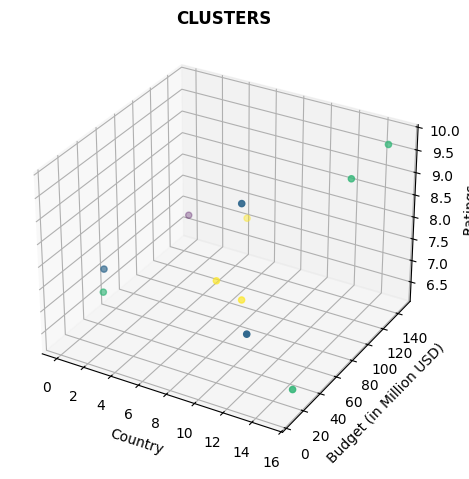

In [ ]:
test_data["cluster"] = kmeans.predict(test_data)
print(test_data)
graph_res(test_data)